## Assignment for FMST
<b>Name: Preneeth O <br>
Batch: 11</b>

## Introduction##



Dataset: <a https://olympus.greatlearning.in/courses/6628/files/359268/download?verifier=Z5A0IUiGXfBHy85UuNvwkLGoUejdqi6k5gKQPQJ3&wrap=1> Concrete.csv </a>

### 1. Import all the necessary libraries

In [51]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

#import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
import seaborn as sn

from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
from sklearn.metrics import f1_score
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, precision_recall_fscore_support
from scipy.stats import spearmanr, pearsonr
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
%matplotlib inline
sn.set(color_codes = True)
import statsmodels.api as sm
from sklearn.model_selection import KFold


### 2. Load the Data

In [52]:
dataSet = pd.read_csv('concrete.csv')
dataSet.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### 3. Basic Exploratory Data Analysis
* Find the shape of the data & various columns
* Univariant Analysis of Independent Attributes
* Bivariant Analysis of Target Attribute and each Indcependent Attributes.
* Check the presence of missing values
* Find the distribution of numerical columns and presence of outliers 

In [53]:
#Shape and column names
print(dataSet.shape)
print (list(dataSet.columns))

(1030, 9)
['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']


<b>Findings: </b> 
* There are 1030 rows and 9 columns. 
* There are 8 Independent Feature and 1 dependent Attribute
* [strength] - Target attribute
* ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age'] - Independent Attribute

In [54]:
# Check the datatypes.
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<b>Findings: </b> 
* All are numeric atrributes. 
* From the above data we can say that tthere are no missing values. But need to further analyze to confirm it

### 3.1 Univarient Analysis 

In [55]:
# Check the five point summary of the data
dataSet.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


<b>Findings: </b> 
    * Cement data seems to be normalized. The mean and 50% quartile is almost same.
    * Slag, Ash, superplastic - min and 25% quartile value is zero that means there are lost of zeros or missing values. 
    But cannot confirm if valid case or not.
    * Age there is long tail as there is lot of diff between 75% quartile and max value.
    * coarseagg, fineagg and strength seems to be normally distributed.

In [56]:
# Functions for exploring each independent attributes

def findOutliers(column):
    anomalies = []
    #Find Q1
    Q1 = column.quantile(0.25)
    #Find Q3
    Q3 = column.quantile(0.75)
    #Find IQR
    IQR = Q3-Q1
    
    #Calculate lower and upper limits
    lower_limit  = Q1 - (IQR *1.5)
    upper_limit =  Q3 + (IQR *1.5)
    # Generate outliers
    for outlier in column:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(round(outlier,2))
    return np.array(anomalies)

def findZeros(col):
    value_counts = col.value_counts()
    df_val_counts = pd.DataFrame(value_counts)
    df_value_counts = df_val_counts.reset_index()
    df_value_counts.columns = ['unique_values', 'counts']
    #print (df_value_counts)
    tuple = df_value_counts.loc[df_value_counts['unique_values'] == 0, 'counts']
    if (len(tuple) > 0):
        return tuple.values[0]
    else:
        return 0
    

def plotCharts(col):
    fig, (ax1,ax2)=plt.subplots(1,2,figsize=(8,5))

    #boxplot
    sn.boxplot(x=col,orient='v',ax=ax1)
    ax1.set_ylabel(col.name)
    ax1.set_title('Boxplot of {}'.format(col.name))
    #ax1.tick_params(labelsize=15)

    #distplot
    sn.distplot(col,ax=ax2)
    ax2.set_title('Distribution of {}'.format(col.name))
    #ax2.tick_params(labelsize=15)


def attributeAnalysis(col):
   
   print ("Range : Min - {:.1f}  Max - {:.1f}".format(col.min(), col.max()))
   print ("Mean : {:.1f}  ".format(col.mean()))
   print ("Median : {:.1f} ".format( col.median())) 
   print ("Standard Deviation :  {:.1f} ".format(col.std()))
   Q1=col.quantile(q=0.25)
   Q2=col.quantile(q=0.50)
   Q3=col.quantile(q=0.75)
   print('1st Quartile (25%) : {:.1f}'.format(Q1))
   print('2nd Quartile (50%) : {:.1f}'.format(Q2))
   print('3st Quartile (75%) : {:.1f}'.format(Q3))
   print('IQR : {:.1f} '.format(stats.iqr(col)))
   print('Ouliers  : ', findOutliers(col))
   print('Count of Ouliers  : ', len(findOutliers(col)))
   print ("Skewness : {:.2f}".format(col.skew()))
   print ("Count of missing values : {:.0f}".format(col.isnull().sum()))
   print ("Number of Zeros : {:.0f}".format(findZeros(col)))

   plotCharts (col)
    
    

#### 3.1.1 Cement Attribute Analysis

Range : Min - 102.0  Max - 540.0
Mean : 281.2  
Median : 272.9 
Standard Deviation :  104.5 
1st Quartile (25%) : 192.4
2nd Quartile (50%) : 272.9
3st Quartile (75%) : 350.0
IQR : 157.6 
Ouliers  :  []
Count of Ouliers  :  0
Skewness : 0.51
Count of missing values : 0
Number of Zeros : 0


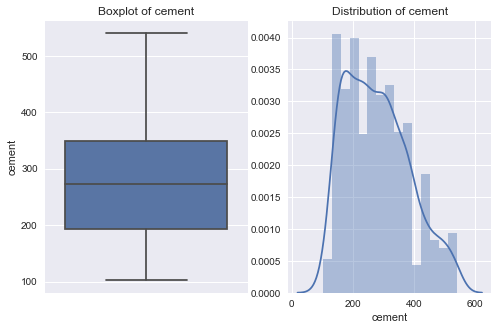

In [57]:
attributeAnalysis ( dataSet.cement)

<b>Findings:</b>
* The distribution seems to be almost normalized.
* Postitive skewed. There is a small tail to right.
* No Outliers
* No missing values

#### 3.1.2 Slag Attribute Analysis

Range : Min - 0.0  Max - 359.4
Mean : 73.9  
Median : 22.0 
Standard Deviation :  86.3 
1st Quartile (25%) : 0.0
2nd Quartile (50%) : 22.0
3st Quartile (75%) : 142.9
IQR : 142.9 
Ouliers  :  [359.4 359.4]
Count of Ouliers  :  2
Skewness : 0.80
Count of missing values : 0
Number of Zeros : 471


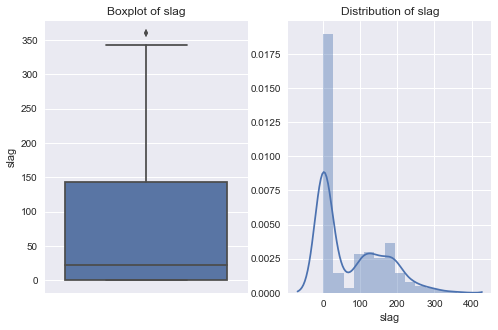

In [58]:
attributeAnalysis (dataSet.slag)

<b>Findings:</b>
* The distribution is not normalized. There are 2 clusters
* Postitive skewed. 
* 2 Outliers
* No missing values, but there are 471 zeros. Not sure if they are missing values or valid value.

#### 3.1.3 Ash Attribute Analysis

Range : Min - 0.0  Max - 200.1
Mean : 54.2  
Median : 0.0 
Standard Deviation :  64.0 
1st Quartile (25%) : 0.0
2nd Quartile (50%) : 0.0
3st Quartile (75%) : 118.3
IQR : 118.3 
Ouliers  :  []
Count of Ouliers  :  0
Skewness : 0.54
Count of missing values : 0
Number of Zeros : 566


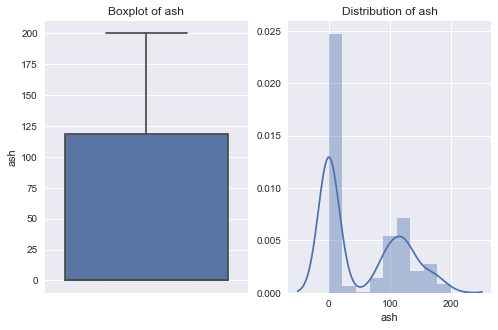

In [59]:
attributeAnalysis (dataSet.ash)

<b>Findings:</b>
* The distribution is not normalized. There are 2 clusters
* Positive skewed. 
* 2 Outliers
* No missing values, but there are 566 zeros. Not sure if they are missing values or valid value.

#### 3.1.4 Water Attribute Analysis

Range : Min - 121.8  Max - 247.0
Mean : 181.6  
Median : 185.0 
Standard Deviation :  21.4 
1st Quartile (25%) : 164.9
2nd Quartile (50%) : 185.0
3st Quartile (75%) : 192.0
IQR : 27.1 
Ouliers  :  [247.  246.9 121.8 121.8 121.8 237.  121.8 236.7 121.8]
Count of Ouliers  :  9
Skewness : 0.07
Count of missing values : 0
Number of Zeros : 0


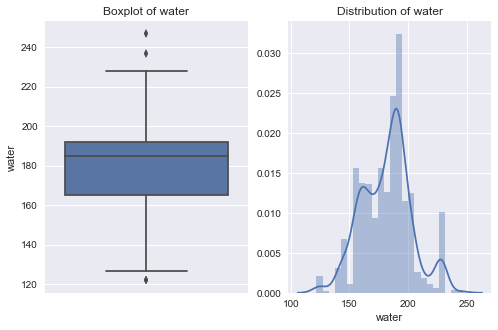

In [60]:
attributeAnalysis (dataSet.water)

<b>Findings:</b>
* The distribution is not normalized. There are 3 clusters
* Skweness is almost zero 
* 9 Outliers values
* No missing values

#### 3.1.5 Superplastic Attribute Analysis

Range : Min - 0.0  Max - 32.2
Mean : 6.2  
Median : 6.4 
Standard Deviation :  6.0 
1st Quartile (25%) : 0.0
2nd Quartile (50%) : 6.4
3st Quartile (75%) : 10.2
IQR : 10.2 
Ouliers  :  [28.2 28.2 32.2 32.2 28.2 32.2 32.2 28.2 32.2 28.2]
Count of Ouliers  :  10
Skewness : 0.91
Count of missing values : 0
Number of Zeros : 379


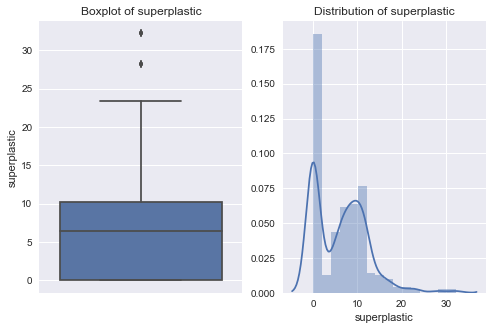

In [61]:
attributeAnalysis (dataSet.superplastic)

<b>Findings:</b>
* The distribution is not normalized. There are 2 clusters
* Positive skewed. 
* 10 Outliers values
* No missing values, but there are 379 zeros. Not sure if they are missing values or valid value.

#### 3.1.6 Coarseagg Attribute Analysis

Range : Min - 801.0  Max - 1145.0
Mean : 972.9  
Median : 968.0 
Standard Deviation :  77.8 
1st Quartile (25%) : 932.0
2nd Quartile (50%) : 968.0
3st Quartile (75%) : 1029.4
IQR : 97.4 
Ouliers  :  []
Count of Ouliers  :  0
Skewness : -0.04
Count of missing values : 0
Number of Zeros : 0


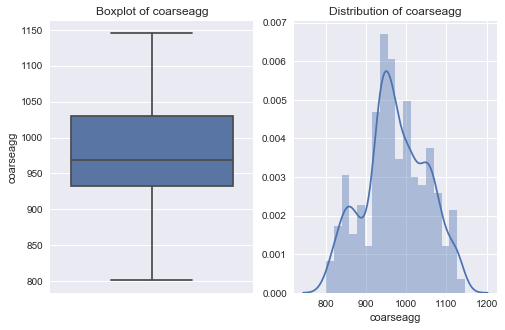

In [62]:
attributeAnalysis (dataSet.coarseagg)

<b>Findings:</b>
* The distribution is almost normalized. There are 3 clusters
* Negative skewness, but almost negligible 
* No Outliers values
* No missing values

#### 3.1.7 fineagg Attribute Analysis

Range : Min - 594.0  Max - 992.6
Mean : 773.6  
Median : 779.5 
Standard Deviation :  80.2 
1st Quartile (25%) : 730.9
2nd Quartile (50%) : 779.5
3st Quartile (75%) : 824.0
IQR : 93.1 
Ouliers  :  [992.6 992.6 992.6 992.6 992.6]
Count of Ouliers  :  5
Skewness : -0.25
Count of missing values : 0
Number of Zeros : 0


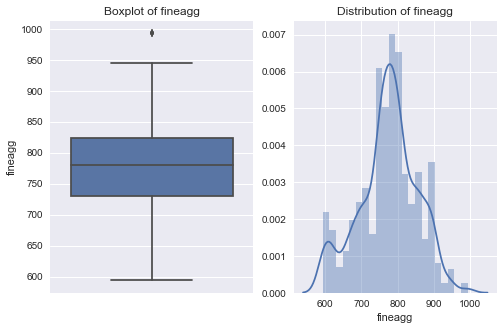

In [63]:
attributeAnalysis (dataSet.fineagg)

<b>Findings:</b>
* The distribution is almost normalized. There are 3 clusters
* Negative skewness
* 5 Outliers values
* No missing values

#### 3.1.8 Age Attribute Analysis

Range : Min - 1.0  Max - 365.0
Mean : 45.7  
Median : 28.0 
Standard Deviation :  63.2 
1st Quartile (25%) : 7.0
2nd Quartile (50%) : 28.0
3st Quartile (75%) : 56.0
IQR : 49.0 
Ouliers  :  [180 365 180 180 180 365 180 270 180 360 365 365 180 180 270 270 270 270
 180 180 270 360 180 360 180 365 360 365 365 180 270 180 180 365 180 180
 270 270 180 180 365 365 180 365 360 180 270 180 270 180 365 360 270 365
 180 180 365 180 270]
Count of Ouliers  :  59
Skewness : 3.27
Count of missing values : 0
Number of Zeros : 0


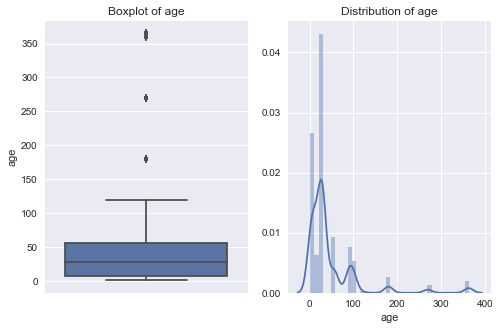

In [64]:
attributeAnalysis (dataSet.age)

<b>Findings:</b>
* The distribution is not normalized and multiple clusters are found
* High +ve skewness, with long tail to right
* 59 Outliers values
* No missing values

### 3.2 Multivarient Analysis

In [65]:
#Check the pairplot for relationship bewteen features.
#sn.pairplot(dataSet,diag_kind='kde')

### 3.2.1 Relationship between Independent Attributes

#### Findings of Diagonal Charts

* The findings independent attributes is covered in univarient analysis.
* Strength attruibute seems to normal guassian.

#### Findings on Relationship between Independent Attributes

* <b>Cement</b>: It does not have any significant relationship with other attributes. The scatter plot is like cloud.
* <b>Slag</b>: It does not have any significant relationship with other attributes. The scatter plot is like cloud.
* <b>Ash</b>: It does not have any significant relationship with other attributes. The scatter plot is like cloud.
* <b>Water</b>: It does not have any significant relationship with cement, slag & ash attributes. It has negative linear relationship with superplastic, coarseagg, & fineagg.
* <b>Superplastic</b>: It does not have any significant relationship with cement, slag, ash, coarseagg, & fineagg attributes. It has negative linear relationship with water.
* <b>Coarseagg</b>: It does not have any significant relationship with other attributes except for water. The scatter plot is like cloud.With water it seems to have negative relationship
* <b>Fineagg</b>: It does not have any significant relationship with other attributes except for water. The scatter plot is like cloud.With water it seems to have negative relationship.
* <b>Age</b>: It does not have any significant relationship with other attributes. The scatter plot is like cloud.

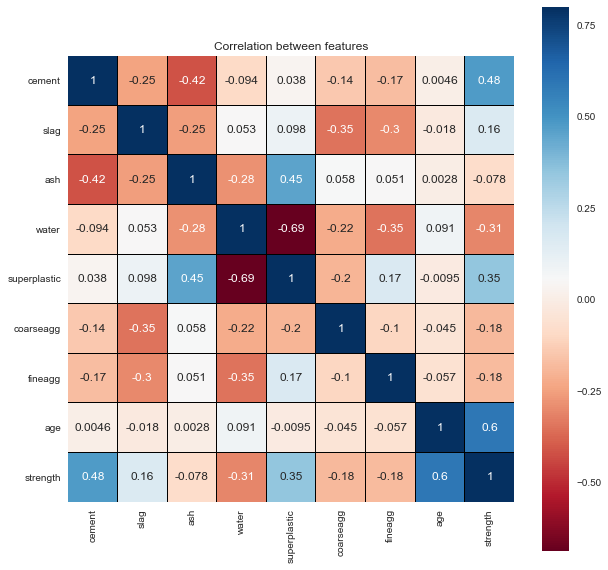

In [66]:
#find correlation between continous variables


corMax=dataSet.corr(method='spearman')
plt.figure(figsize=(10, 10))
sn.heatmap(corMax, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="RdBu",linecolor="black")
plt.title('Correlation between features');

<b>Findings</b>
* The features are having a non-Gaussian distribution, <b>spearman corrrleation method</b> will be better to find the relationship between 2 features
* The correlationship between attributes is shown in a heat map. It also conveys the same message as in pairplot


### 3.2.2 Independent Attributes Relationship with Target Attribute (Strength)

In [67]:
def plotIndividualChartsWithTarget():

    fig, axes =plt.subplots(4,2,figsize=(20,25))
    loc1 = axes[0,0]
    sn.regplot(x=dataSet.cement, y=dataSet.strength, color="g", ax=loc1)
    loc1.set_ylabel('Strength')
    loc1.set_title(str(spearmanr(dataSet.cement, dataSet.strength)))
    
    loc2 = axes[0,1]
    sn.regplot(x=dataSet.slag, y=dataSet.strength, color="b", ax=loc2)
    loc2.set_ylabel('Strength')
    loc2.set_title(str(spearmanr(dataSet.slag, dataSet.strength)))
    
    loc3 = axes[1,0]
    sn.regplot(x=dataSet.ash, y=dataSet.strength, color="b", ax=loc3)
    loc3.set_ylabel('Strength')
    loc3.set_title(str(spearmanr(dataSet.ash, dataSet.strength)))
    
    loc4 = axes[1,1]
    sn.regplot(x=dataSet.water, y=dataSet.strength, color="g", ax=loc4)
    loc4.set_ylabel('Strength')
    loc4.set_title(str(spearmanr(dataSet.water, dataSet.strength)))
    
    loc5 = axes[2,0]
    sn.regplot(x=dataSet.superplastic, y=dataSet.strength, color="g", ax=loc5)
    loc5.set_ylabel('Strength')
    loc5.set_title(str(spearmanr(dataSet.superplastic, dataSet.strength)))
    
    loc6 = axes[2,1]
    sn.regplot(x=dataSet.coarseagg, y=dataSet.strength, color="b", ax=loc6)
    loc6.set_ylabel('Strength')
    loc6.set_title(str(spearmanr(dataSet.coarseagg, dataSet.strength)))
    
    loc7 = axes[3,0]
    sn.regplot(x=dataSet.fineagg, y=dataSet.strength, color="b", ax=loc7)
    loc7.set_ylabel('Strength')
    loc7.set_title(str(spearmanr(dataSet.fineagg, dataSet.strength)))
    
    loc8 = axes[3,1]
    sn.regplot(x=(dataSet.age), y=dataSet.strength, color="g", ax=loc8)
    loc8.set_ylabel('Strength')
    loc8.set_title(str(spearmanr(dataSet.age, dataSet.strength)))
    
    
#plotIndividualChartsWithTarget()    

<b>Findings</b>

* <b>Cement:</b> Strength has +0.48 correlation with Cement. It has a strong +ve linear relationship. 
    <u>It can be good predictor attribute</u>.
* <b>Slag:</b> Strength has +0.16 correlation with Slag. It does not have strong corelation ship, 
    hence cannot be a good predictor attribute
* <b>Ash:</b> Strength has -0.07 correlation with Ash. It does not have strong corelation ship, 
    hence cannot be a good predictor attribute
* <b>Water:</b> Strength has -0.31 correlation with water. It has a strong -ve linear relationship. 
    <u>It can be good predictor attribute</u>.
* <b>Superplastic:</b> Strength has +0.34 correlation with Superplastic. It has a strong +ve linear relationship. 
    <u>It can be good predictor attribute</u>.
* <b>Coarseagg:</b> Strength has -0.18 correlation with coarseagg. It does not have strong corelation ship, 
    hence cannot be a good predictor attribute    
* <b>Fineagg:</b> Strength has -0.17 correlation with Fineagg. It does not have strong corelation ship, 
    hence cannot be a good predictor attribute
* <b>Age:</b> Strength has +0.59 correlation with Cement. It has a strong +ve linear relationship, 
    but it cannot be good predictor because same value of age has mutiple values of strength.


### 3.3 Handling Missing Values & Outliers

### 3.3.1 Handling Missing values

In section 3.1 (Univarient Analysis) we have seen that there are <b>no missing values in data</b>. 
However there are <b>quite a few zeros for Slag, Ash and superplastic features</b>. 
These Zeros can be missing value or may be valid. Since we dont have complete domain knowledge, 
<b>we assume that the zeros are valid</b>.


### 3.3.2 Handling Outliers

In section 3.1 (Univarient Analysis) we have seen that there are <b>outliers in  slag, water, superplastic, fineagg & age</b>. Fix the outliers with imputing median values


In [68]:
#Function to replace outliers lying outside IQR range with median value.
def fixOutlier (dataSet, col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    max_value = Q3+(1.5*IQR)
    min_value = Q1-(1.5*IQR) 
    dataSet.loc[(col < min_value) | (col > max_value), col.name] = col.median()
    


Range : Min - 2.3  Max - 82.6
Mean : 35.8  
Median : 34.4 
Standard Deviation :  16.7 
1st Quartile (25%) : 23.7
2nd Quartile (50%) : 34.4
3st Quartile (75%) : 46.1
IQR : 22.4 
Ouliers  :  [81.75 79.99 82.6  80.2 ]
Count of Ouliers  :  4
Skewness : 0.42
Count of missing values : 0
Number of Zeros : 0


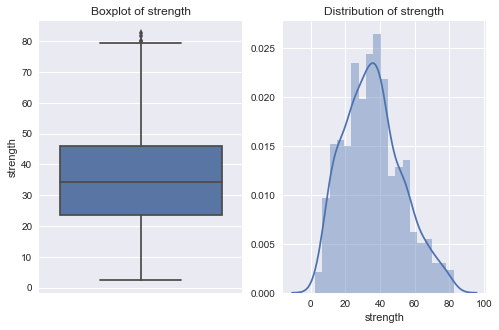

In [69]:
# Find the outliers in target column and compare it with independent variables on Leverage Points & Influence point
attributeAnalysis(dataSet.strength)

<b>Findings</b>
* The outliers for strength attribute are  only 81.75 79.99 82.6  80.2.
* Checking regression scatter plot in section 3.2.2 for <b>High leverage points</b> of slag, water, superplastic, fineagg & age, we find that it has only <b>Low Influence </b>. Hence there is no need to fix the outliers. 
* Any ways will go ahead and fix the outliers in Independent attributes

In [70]:
# The above function is called for columns where outlier is identified.
fixOutlier(dataSet, dataSet.slag)
fixOutlier(dataSet, dataSet.water)
fixOutlier(dataSet, dataSet.superplastic)
fixOutlier(dataSet, dataSet.fineagg)
fixOutlier(dataSet, dataSet.age)

### 4 Feature Engg, Model Selection & Fine Tuning.

In [71]:
# Scale the data to z-score
dataSet_z = dataSet.apply(zscore)


# Split X and y into training and test set in 70:30 ratio

X = dataSet_z.iloc[:,0:8]
y = dataSet_z.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [72]:
# A generic function to execute model, calculate model score and find coorelation between test and predicted values
def executeModel(model, X_train, X_test, y_train, y_test ):
    
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    model_score_train = model.score(X_train, y_train)
    model_score = model.score(X_test, y_test)

    
    print('Accuracy of model on test set: {:.2f}'.format(model_score))
    y_pred = model.predict(X_test)
    sn.set(style="darkgrid", color_codes=True)            
    with sn.axes_style("white"):
        sn.jointplot(x=y_test, y=y_pred, kind="reg", color="k");
    corrWithResult = str(round(pearsonr(y_pred, y_test)[0],2))
    return str(round(model_score,2)), str(round(model_score_train,2)), corrWithResult

def executeModelWithKfold (model, X, y):
    
    num_folds = 10
    seed = 7
    kfold = KFold(n_splits=num_folds, random_state=seed)
    results = cross_val_score(model, X, y, cv=kfold)
    print('Accuracy of model with Kfold: {:.2f}'.format(results.mean()))
    return str(round(results.mean(),2))

### Linear Regression

Accuracy of model on test set: 0.70
Accuracy of model with Kfold: 0.70


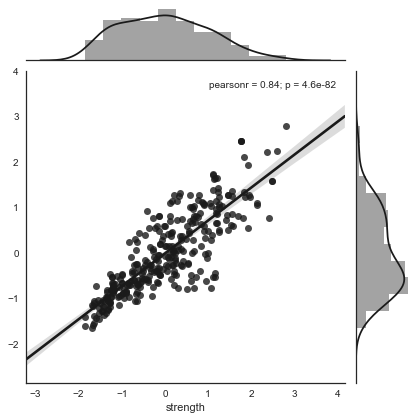

In [73]:
regression_model = LinearRegression()
# Execute the model
regression_model_score, regression_modelTrain_score,regression_model_corr = executeModel (regression_model, X_train, X_test, y_train, y_test)
# Execute the model with KFold Technique
regression_model_kfold = executeModelWithKfold(regression_model, X, y)

In [74]:
#Dataframe to hold the results of all models
results = pd.DataFrame({'Model':['Linear Regression'], \
                        'Train Accuracy':regression_modelTrain_score, \
                        'Test Accuracy': regression_model_score, \
                        "Kfold Test Accuracy": regression_model_kfold, \
                        "Pearsonr": regression_model_corr},index={'1'})
results = results[['Model', 'Train Accuracy', 'Test Accuracy', "Kfold Test Accuracy", 'Pearsonr']]
results

,Model,Train Accuracy,Test Accuracy,Kfold Test Accuracy,Pearsonr
1,Linear Regression,0.72,0.7,0.7,0.84


<b>Findings:</b>
* The model accuracy is only 0.7, 
* With Kfold testing also it is 0.7
* Since on many dimensions, the relationship is not really linear, let us try polynomial models (quadratic)

### Polynomial model (quadratic)

Accuracy of model on test set: 0.78


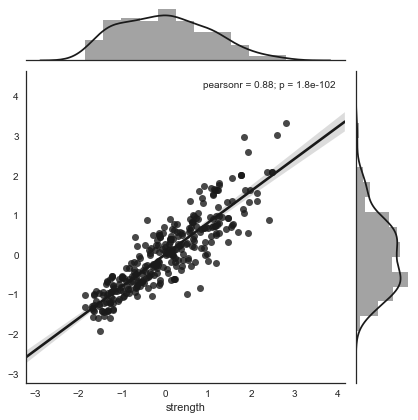

In [75]:

from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(degree=3, interaction_only=True)
X_train_ = poly_model.fit_transform(X_train)
X_test_ = poly_model.fit_transform(X_test)
# Execute the model
poly_model_score, poly_modelTrain_score, poly_model_corr = executeModel (regression_model, X_train_, X_test_, y_train, y_test)


In [76]:

results = results.append ({'Model':'Polynomial model', \
                           'Train Accuracy': poly_modelTrain_score, \
                           'Test Accuracy': poly_model_score, \
                           'Pearsonr': poly_model_corr }, \
               ignore_index=True)
results

,Model,Train Accuracy,Test Accuracy,Kfold Test Accuracy,Pearsonr
0,Linear Regression,0.72,0.7,0.7,0.84
1,Polynomial model,0.83,0.78,NaN,0.88


<b>Findings:</b>
* The accuracy of the polynomial model has improved. Let us identify columns which are not important and elminate it and see the performance.

### Decision Tree Regressor

Accuracy of model on test set: 0.82
Accuracy of model with Kfold: 0.86


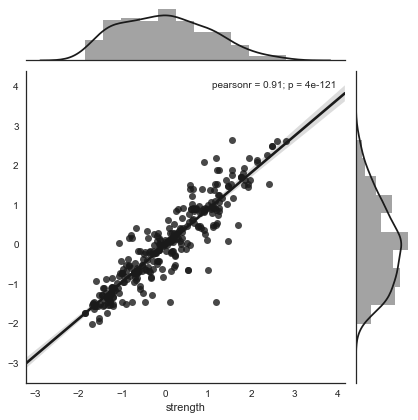

In [77]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
dtr_model_score, dtr_modelTrain_score, dtr_model_corr = executeModel (dtr_model, X_train, X_test, y_train, y_test)
dtr_model_kfold = executeModelWithKfold(dtr_model, X, y)

In [78]:
results = results.append ({'Model':'Decision Tree Regressor', \
                           'Train Accuracy': dtr_modelTrain_score, \
                           'Test Accuracy': dtr_model_score, \
                           'Kfold Test Accuracy': dtr_model_kfold, \
                           'Pearsonr': dtr_model_corr }, 
               ignore_index=True)
results

,Model,Train Accuracy,Test Accuracy,Kfold Test Accuracy,Pearsonr
0,Linear Regression,0.72,0.7,0.7,0.84
1,Polynomial model,0.83,0.78,NaN,0.88
2,Decision Tree Regressor,0.99,0.82,0.86,0.91


<b>Findings:</b>

* The decision tree accuracy has improved further to 0.85. 

### Decision Tree Regressor with regularization

Accuracy of model on test set: 0.83
Accuracy of model with Kfold: 0.85


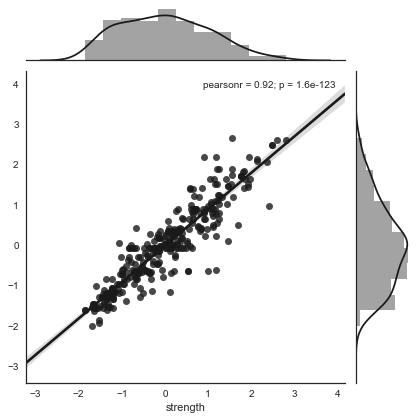

In [79]:
dtr_model_regularization = DecisionTreeRegressor(max_depth = 10,random_state=1)

dtr_model_regularization_score, dtr_modelTrain_regularization_score, dtr_model_regularization_corr = executeModel (dtr_model_regularization, X_train, X_test, y_train, y_test)
dtr_model_regularization_kfold = executeModelWithKfold(dtr_model_regularization, X, y)

In [80]:
results = results.append ({'Model':'Decision Tree Regressor with regularization', \
                           'Train Accuracy': dtr_modelTrain_regularization_score, \
                           'Test Accuracy': dtr_model_regularization_score, \
                           'Kfold Test Accuracy': dtr_model_regularization_kfold, \
                           'Pearsonr': dtr_model_regularization_corr }, \
               ignore_index=True)
results

,Model,Train Accuracy,Test Accuracy,Kfold Test Accuracy,Pearsonr
0,Linear Regression,0.72,0.7,0.7,0.84
1,Polynomial model,0.83,0.78,NaN,0.88
2,Decision Tree Regressor,0.99,0.82,0.86,0.91
3,Decision Tree Regressor with regularization,0.97,0.83,0.85,0.92


<b>Findings:</b>

* The decision tree with regularization there is no improvement in accuracy. 
* Let us explore the option of removing the insignificant features and check the performance.

### Find important features

In [81]:
impFeatures = pd.DataFrame(dtr_model.feature_importances_,columns=['Imp'],index=X_train.columns)

print('Feature importances: \n',impFeatures.sort_values(by=['Imp'], ascending=False))

Feature importances: 
                    Imp
cement        0.353079
age           0.328552
water         0.126422
slag          0.095117
fineagg       0.034706
coarseagg     0.032235
superplastic  0.018158
ash           0.011730


<b>Findings:</b>
    
* The Cement, Age and water seems to be significant attributes.
* Rest of the attibutes - Slag, coarseagg, fineagg, superplastic & ash seems to be insignificant attributes
* Let us remove the insignificant attributes and check the performance

### Decision Tree Regressor with reduced Attributes

In [82]:
X_reduced = dataSet_z[['cement', 'water', 'slag', 'age']]
y = dataSet_z.iloc[:,-1]
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_reduced, y, test_size=0.30, random_state=1)

Accuracy of model on test set: 0.85
Accuracy of model with Kfold: 0.85


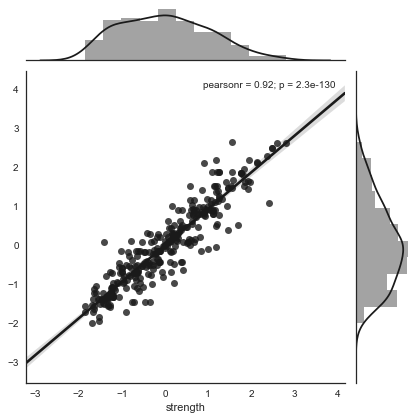

In [101]:
dtr_model_reduced = DecisionTreeRegressor()
dtr_model_reduced_score, dtr_modelTrain_reduced_score, dtr_model_reduced_corr = executeModel (dtr_model_reduced,X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test)
dtr_model_reduced_kfold = executeModelWithKfold(dtr_model, X, y)

In [102]:
results = results.append ({'Model':'Decision Tree Regressor with reduced attributes ', \
                           'Train Accuracy': dtr_modelTrain_reduced_score, \
                           'Test Accuracy': dtr_model_reduced_score, \
                           'Kfold Test Accuracy':  dtr_model_reduced_kfold, \
                           'Pearsonr': dtr_model_reduced_corr }, \
               ignore_index=True)
results

,Model,Train Accuracy,Test Accuracy,Kfold Test Accuracy,Pearsonr
0,Linear Regression,0.72,0.7,0.7,0.84
1,Polynomial model,0.83,0.78,NaN,0.88
2,Decision Tree Regressor,0.99,0.82,0.86,0.91
3,Decision Tree Regressor with regularization,0.97,0.83,0.85,0.92
4,Decision Tree Regressor with reduced attributes,0.99,0.85,NaN,0.93
5,Decision Tree Regressor with reduced attributes,0.99,0.85,0.85,0.92


<b>Findings:</b>
    
* The performance of the model is deteriorating by removing insignificant attributes.
* We will not remove any features.

### K-Means Clustering

In [85]:
# Achieved 0.86 accuracy with Decision Tree. The low score is due to the large spread and apparent mix of gaussians
# Let us explore the data for hidden clusters

In [86]:
 # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
from sklearn.cluster import KMeans
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(dataSet)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,cluster_errors,num_clusters
0,3.709976e+07,1
1,2.774842e+07,2
2,2.141025e+07,3
3,1.899769e+07,4
4,1.662461e+07,5
5,1.470944e+07,6
6,1.355548e+07,7
7,1.244667e+07,8
8,1.143682e+07,9
9,1.090185e+07,10


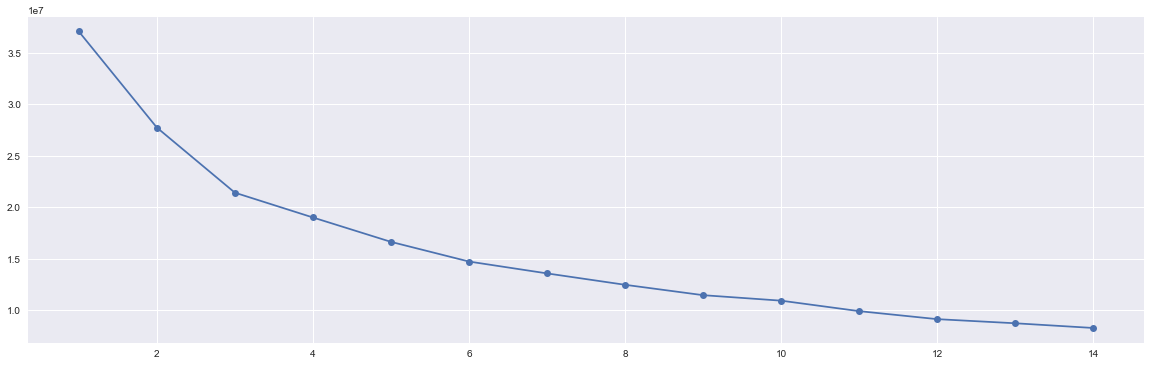

In [87]:
# Elbow plot
plt.figure(figsize=(20,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [88]:
cluster = KMeans( n_clusters = 3, random_state = 1 )
cluster.fit(dataSet_z)

prediction=cluster.predict(dataSet_z)

dataSet_z_copy = dataSet_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly
dataSet_z_copy["GROUP"] = prediction # Creating a new column "GROUP" which will hold the cluster id of each record

In [89]:
dataSet_z_copy.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,GROUP
0,-1.339017,1.625902,-0.847144,1.060879,-1.091166,-0.014398,-0.305676,-0.153159,-0.355018,2
1,-1.074790,-0.363717,1.096078,-1.134020,0.881615,1.388141,0.300692,-0.656933,-0.737108,0
2,-0.298384,-0.858192,0.648965,0.279067,-0.086509,-0.206121,1.126981,-0.153159,-0.395144,0
3,-0.145209,0.477594,-0.847144,2.250592,-1.091166,-0.526517,-1.303578,-0.153159,0.600806,2
4,-1.209776,1.290784,-0.847144,0.565570,0.571085,0.958372,-0.964165,-0.153159,-1.049727,2


In [90]:
centroids = cluster.cluster_centers_
centroids

array([[-0.62941467, -0.39538729,  1.1179162 , -0.2629568 ,  0.48853172,
         0.09348509,  0.23443503,  0.11128117, -0.23629913],
       [ 0.95365215,  0.50467825, -0.41273745, -0.90412655,  0.96894405,
        -0.65516133,  0.07589675,  0.03645514,  1.12615889],
       [ 0.081919  ,  0.10021308, -0.80717941,  0.70699999, -0.94636915,
         0.25306982, -0.25317864, -0.12039974, -0.365993  ]])

In [91]:
centroid_df = pd.DataFrame(centroids, columns = list(dataSet) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.629415,-0.395387,1.117916,-0.262957,0.488532,0.093485,0.234435,0.111281,-0.236299
1,0.953652,0.504678,-0.412737,-0.904127,0.968944,-0.655161,0.075897,0.036455,1.126159
2,0.081919,0.100213,-0.807179,0.707000,-0.946369,0.253070,-0.253179,-0.120400,-0.365993


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d0b6fd0>,
      dtype=object)

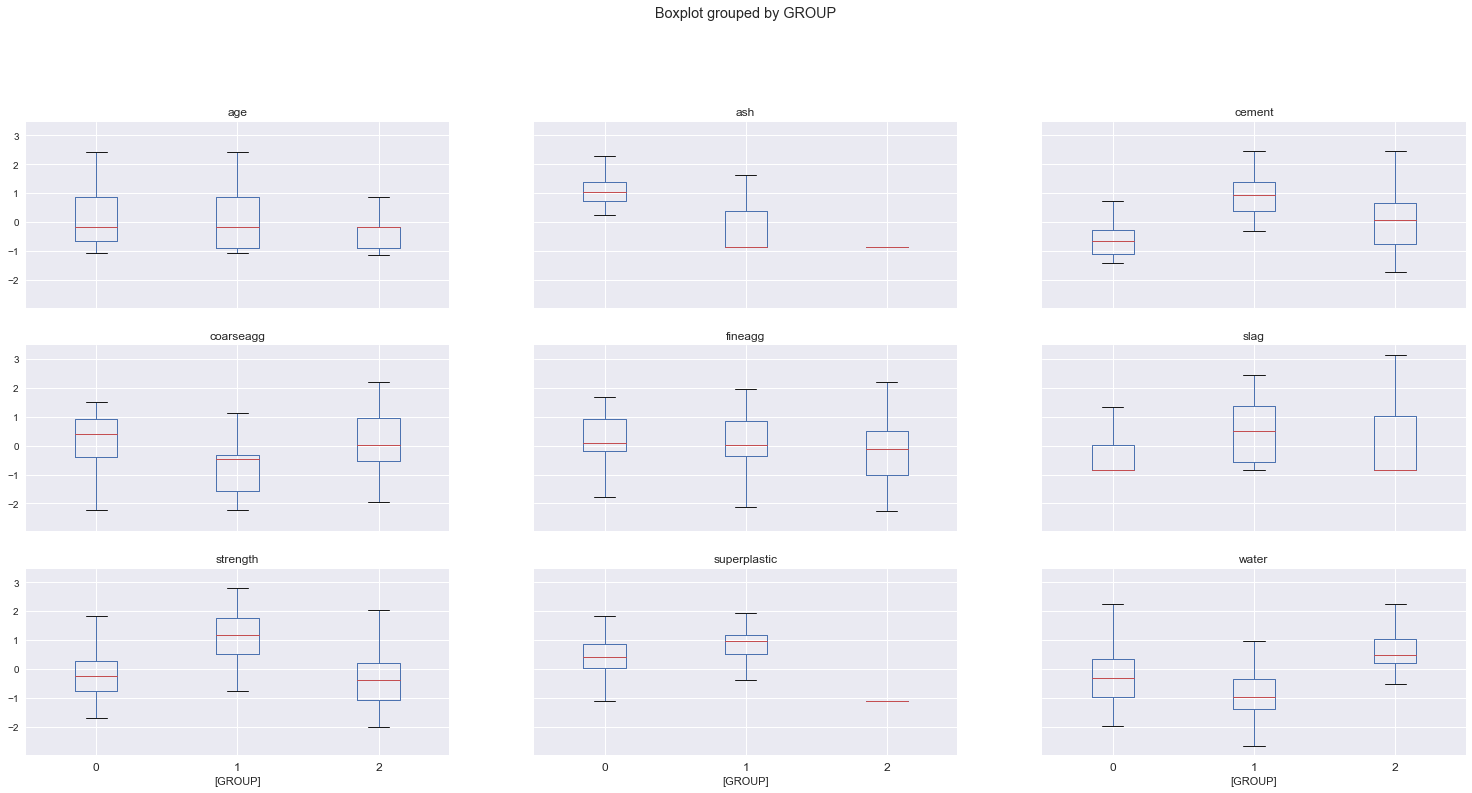

In [92]:
dataSet_z_copy.boxplot(by = 'GROUP',  layout=(5,3), figsize=(25, 20))

<b>Findings:</b>
    
* There are no attributes which are good predictors of target attribute.
* We are no able figure out clusters with different characteristics. 


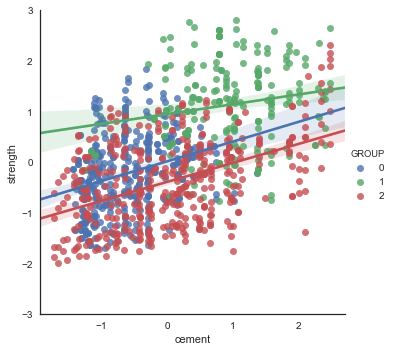

In [93]:
# Strength Vs Cement

var = 'cement'

with sn.axes_style("white"):
    plot = sn.lmplot(var,'strength',data=dataSet_z_copy,hue='GROUP')
plot.set(ylim = (-3,3))

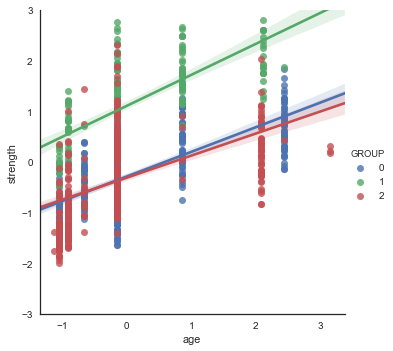

In [94]:
var = 'age'

with sn.axes_style("white"):
    plot = sn.lmplot(var,'strength',data=dataSet_z_copy,hue='GROUP')
plot.set(ylim = (-3,3))

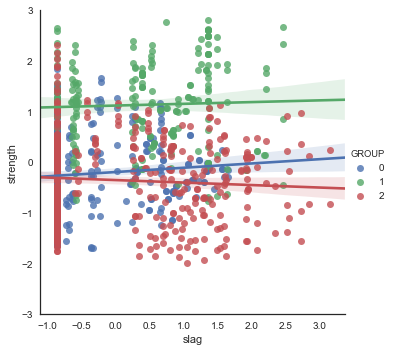

In [95]:
var = 'slag'

with sn.axes_style("white"):
    plot = sn.lmplot(var,'strength',data=dataSet_z_copy,hue='GROUP')
plot.set(ylim = (-3,3))

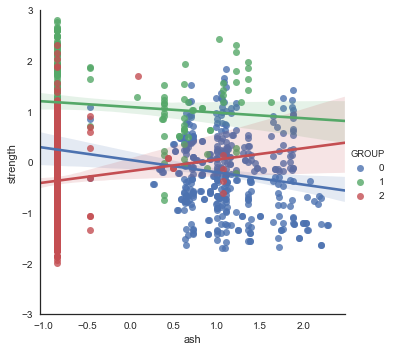

In [96]:
var = 'ash'

with sn.axes_style("white"):
    plot = sn.lmplot(var,'strength',data=dataSet_z_copy,hue='GROUP')
plot.set(ylim = (-3,3))

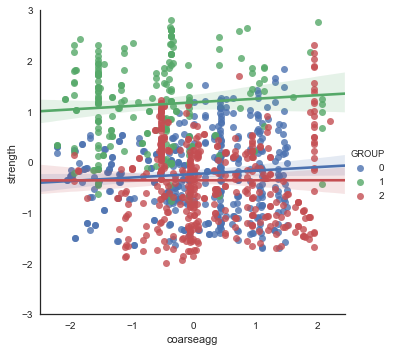

In [97]:
var = 'coarseagg'

with sn.axes_style("white"):
    plot = sn.lmplot(var,'strength',data=dataSet_z_copy,hue='GROUP')
plot.set(ylim = (-3,3))

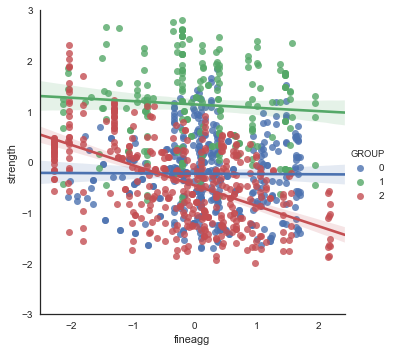

In [98]:
var = 'fineagg'

with sn.axes_style("white"):
    plot = sn.lmplot(var,'strength',data=dataSet_z_copy,hue='GROUP')
plot.set(ylim = (-3,3))

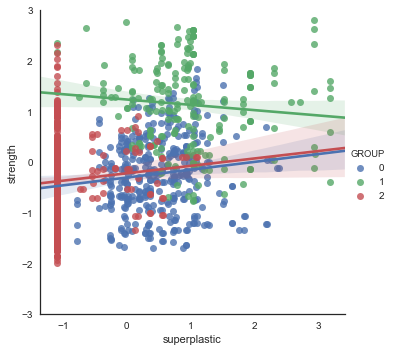

In [99]:
var = 'superplastic'

with sn.axes_style("white"):
    plot = sn.lmplot(var,'strength',data=dataSet_z_copy,hue='GROUP')
plot.set(ylim = (-3,3))

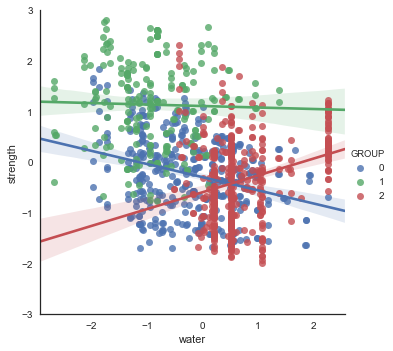

In [100]:
var = 'water'

with sn.axes_style("white"):
    plot = sn.lmplot(var,'strength',data=dataSet_z_copy,hue='GROUP')
plot.set(ylim = (-3,3))